In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df3 = pd.read_csv("history_model_v3.csv")
df4 = pd.read_csv("history_model_v4.csv")
df5 = pd.read_csv("history_model_v6.csv")

In [4]:
df3.head()

,loss,accuracy,f1_score,val_loss,val_accuracy,val_f1_score
0,0.244708,0.906255,[0.9495416 0.34045166],0.209912,0.925835,[0.9600322 0.48629922]
1,0.217162,0.913845,[0.9532739 0.44834083],0.202052,0.930048,[0.96217895 0.53508145]
2,0.213806,0.919415,[0.95621955 0.49427235],0.207607,0.923978,[0.9592349 0.43737686]
3,0.209547,0.920648,[0.9568935 0.5013976],0.201407,0.925309,[0.9601186 0.41264644]
4,0.207263,0.922550,[0.9579484 0.51048326],0.200976,0.926320,[0.96035767 0.47884247]


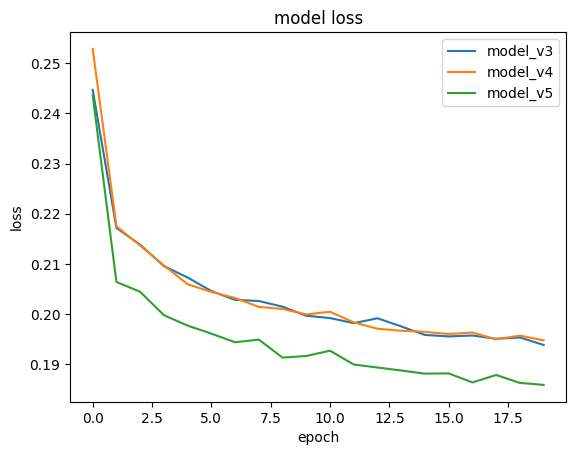

In [5]:
plt.plot(df3['loss'], label='model_v3')
plt.plot(df4['loss'], label='model_v4')
plt.plot(df5['loss'], label='model_v5')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

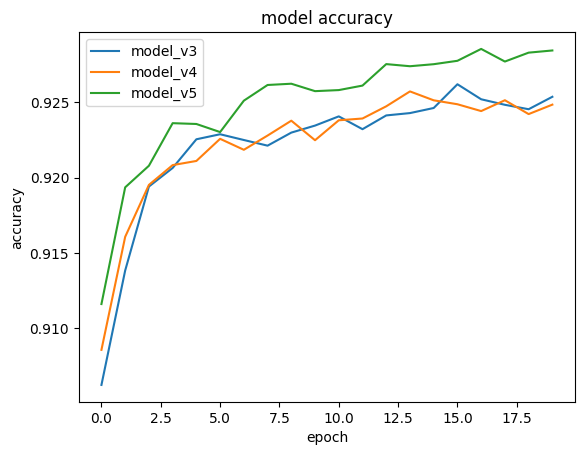

In [6]:
plt.plot(df3['accuracy'], label='model_v3')
plt.plot(df4['accuracy'], label='model_v4')
plt.plot(df5['accuracy'], label='model_v5')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

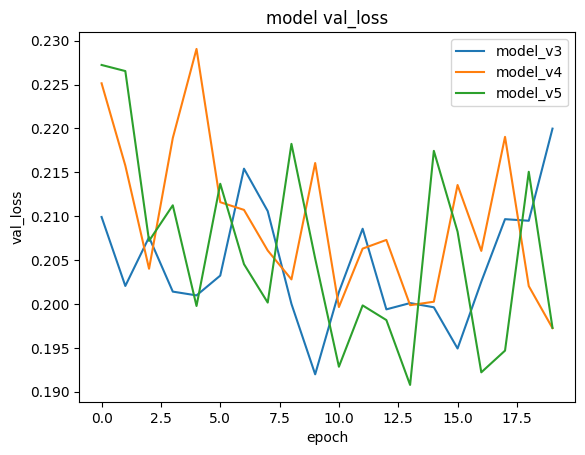

In [7]:
plt.plot(df3['val_loss'], label='model_v3')
plt.plot(df4['val_loss'], label='model_v4')
plt.plot(df5['val_loss'], label='model_v5')
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

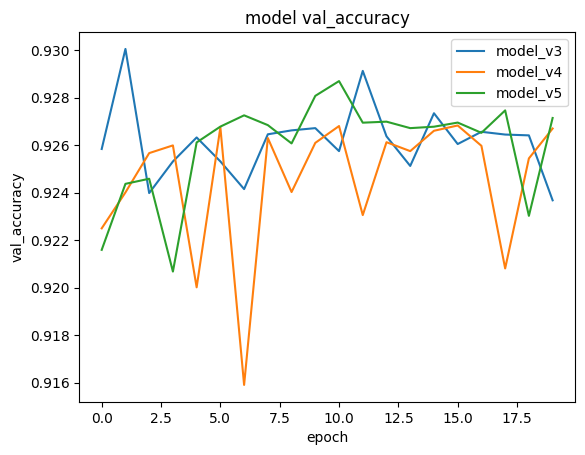

In [8]:
plt.plot(df3['val_accuracy'], label='model_v3')
plt.plot(df4['val_accuracy'], label='model_v4')
plt.plot(df5['val_accuracy'], label='model_v5')
plt.title('model val_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [9]:
def fix_f1(df):
    f1 = df['f1_score'].values
    scores = np.array([np.fromstring(s.strip('[]'), dtype=float, sep=' ') for s in f1])
    df["f1_0"] = scores[:,0]
    df["f1_1"] = scores[:,1]
    f1_val = df['val_f1_score'].values
    scores_val = np.array([np.fromstring(s.strip('[]'), dtype=float, sep=' ') for s in f1_val])
    df["f1_0_val"] = scores_val[:,0]
    df["f1_1_val"] = scores_val[:,1]
    df.drop(columns=['f1_score', 'val_f1_score'], inplace=True)
    return df

In [10]:
df3 = fix_f1(df3)
df4 = fix_f1(df4)
df5 = fix_f1(df5)